In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Read the dataset to the python environment

In [31]:
data=pd.read_excel(r"C:\Users\user\Desktop\iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
data.shape

(150, 5)

In [33]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps

filling missing values

In [60]:
x=data.drop(["Classification"],axis=1)
y=(data["Classification"])

In [37]:
data.groupby("Classification")[["SL"]].median()

,SL
Classification,
Iris-setosa,5.00
Iris-versicolor,5.85
Iris-virginica,6.50


In [38]:
data.groupby("Classification")[["SW"]].median()

,SW
Classification,
Iris-setosa,3.4
Iris-versicolor,2.8
Iris-virginica,3.0


filling null values

In [39]:
data.groupby("Classification")[["PL"]].median()

,PL
Classification,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [40]:
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('median'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [41]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [42]:
#Checking for outliers

Text(0.5, 1.0, 'Boxplot of SL')

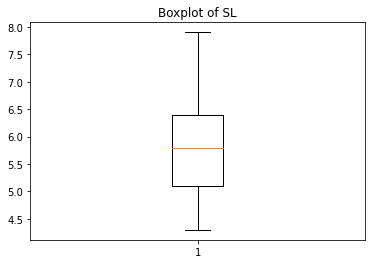

In [43]:
plt.boxplot(data["SL"])
plt.title("Boxplot of SL")

Text(0.5, 1.0, 'Boxplot of SW')

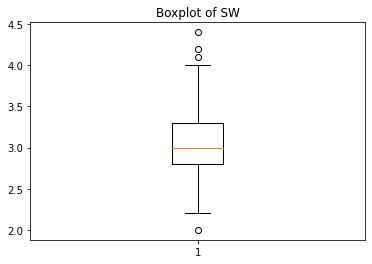

In [44]:
plt.boxplot(data["SW"])
plt.title("Boxplot of SW")

Text(0.5, 1.0, 'Boxplot of PL')

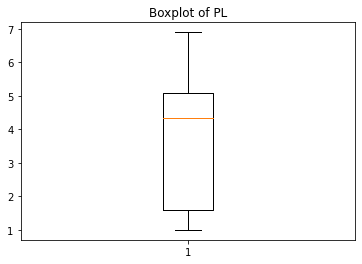

In [45]:
plt.boxplot(data["PL"])
plt.title("Boxplot of PL")

Text(0.5, 1.0, 'Boxplot of PW')

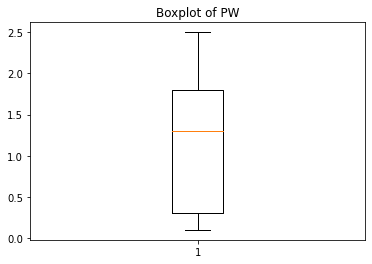

In [46]:
plt.boxplot(data["PW"])
plt.title("Boxplot of PW")

In [47]:
# handling the outliers of "SW"

In [48]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [49]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.05
4.05


In [50]:
outlier=[]

In [51]:
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [52]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [53]:
ind1=data.index[(data["SW"]<low_lim) | (data["SW"]>up_lim)]
data.loc[ind1].index

Int64Index([15, 32, 33, 60], dtype='int64')

In [54]:
data.drop([15 ,32, 33, 60],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

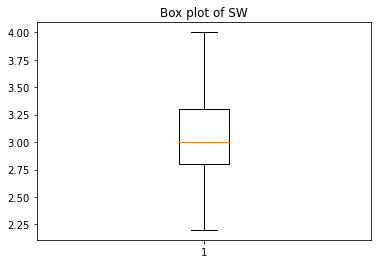

In [55]:
plt.boxplot(data["SW"])
plt.title("Box plot of SW")

# 3.  Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Label encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ["Classification"]   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    data[i] = label_encoders[i].fit_transform(data[i]) 
  

In [57]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.0,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,5.55,2.0,2
148,6.2,3.4,5.40,2.3,2


# Logistic regression

In [61]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


0.9666666666666667

# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# Kernel SVM

In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [67]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


0.9666666666666667

# Random forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [69]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# Decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)

In [72]:
accuracy_score(y_test,y_predict)

0.9333333333333333

In [73]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# Gradient boosting classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict=GBC.predict(x_test)

In [76]:
accuracy_score(y_test,y_predict)

0.9333333333333333

In [79]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# All the classification models are gives the best result to predict iris species.